## load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Y and X
X: all except returned
Y: returned

In [3]:
df_model_auctions = pd.read_csv('used_car_extend_model_onehot.csv')

In [4]:
# y will be auction_start_price
df_model_auctions['auction_start_price'].isnull().sum()

0

In [5]:
df_model_auctions = df_model_auctions.reset_index()

In [6]:
y_vecs_return = df_model_auctions[['returned']]
x_vecs_return = df_model_auctions.drop(['returned'], axis=1)

y_vecs_price = df_model_auctions[['auction_start_price']]
x_vecs_price = df_model_auctions.drop(['auction_start_price','insp_rep_priceSellerExpectation','insp_rep_priceInspectorExpectation'], axis=1)#
#'auction_start_price'

In [7]:
print (y_vecs_price.shape, y_vecs_return.shape, x_vecs_return.shape)

(23835, 1) (23835, 1) (23835, 775)


In [8]:
returned_rate = y_vecs_return[y_vecs_return['returned'] == 1].shape[0]/y_vecs_return[y_vecs_return['returned'] == 0].shape[0]
print('returned rate',returned_rate)


returned rate 0.04192166462668299


## Predict returned (machine learning)

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
x_train_return, x_test_return, y_train_return, y_test_return = train_test_split(x_vecs_return,y_vecs_return,test_size=0.2)

In [11]:
x_train_return.isnull().sum().sum()

0

In [12]:
from sklearn import ensemble

params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.01,
    'criterion': 'mse'
}

In [13]:
gradient_boosting_classi = ensemble.GradientBoostingClassifier(**params)

In [14]:
gradient_boosting_classi.fit(x_train_return, y_train_return)

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.01,
              loss='deviance', max_depth=6, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [23]:
## create df of feature important to make plotting easy
n_features = 20
data= []
dat ={}
objects = list(x_train_return.columns)[1:n_features+1] # exclude index
f_important = gradient_boosting_classi.feature_importances_[1:n_features+1]
for i in range(len(objects)):
    dat[objects[i]] =  f_important[i]
data +=[dat]

In [26]:
df_imp = pd.DataFrame(data)
df_imp = df_imp.transpose()
df_imp = df_imp.sort_values(by=0, axis=0, ascending=True)


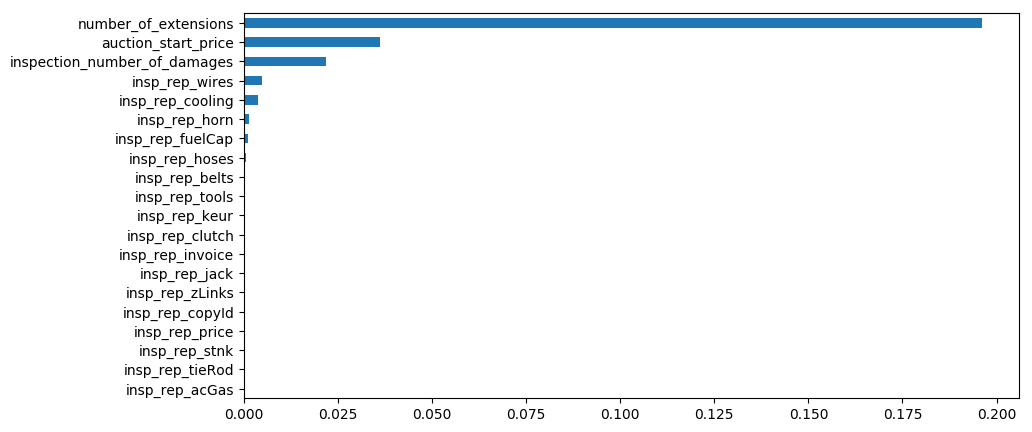

In [27]:

# make plot
df_imp.plot(kind='barh',legend=False, figsize=(10,5))

In [31]:
print("Accuracy score (training): {0:.3f}".format(gradient_boosting_classi.score(x_train_return, y_train_return)))
print("Accuracy score (validation): {0:.3f}".format(gradient_boosting_classi.score(x_test_return, y_test_return)))

Accuracy score (training): 0.968
Accuracy score (validation): 0.967


## Price Prediction

In [32]:
# Must remove X that contains price variable

In [33]:
x_train_price, x_test_price, y_train_price, y_test_price = train_test_split(x_vecs_price,y_vecs_price,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso#, ElasticNetCV, 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import cross_val_score


In [36]:
lin_reg = LinearRegression()
deci_tree = DecisionTreeRegressor()
lasso_reg = Lasso(alpha=0.05)


In [ ]:
lin_reg.fit(x_train_price, y_train_price)

In [ ]:
deci_tree.fit(x_train_price, y_train_price)

In [ ]:
lasso_reg.fit(x_train_price, y_train_price)

In [ ]:
y_lin_pred = lin_reg.predict(x_vecs_price)

In [38]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
# sys.path
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = y_train_price, exog = x_train_price).fit() 

In [72]:
# regressor_OLS.summary()

<BarContainer object of 20 artists>

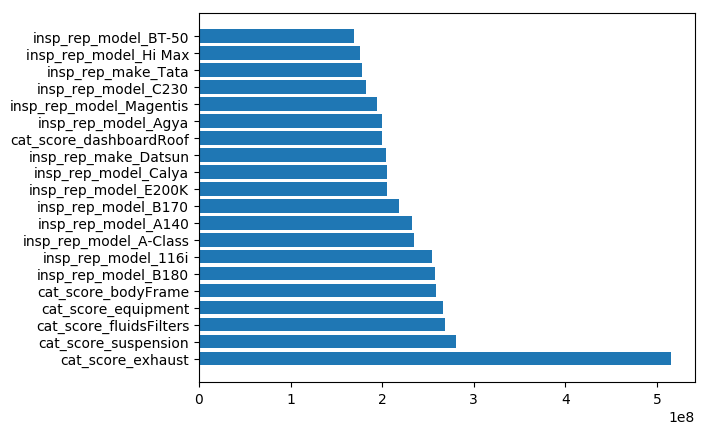

In [71]:
price_indx20 = regressor_OLS.params.sort_values(axis=0, ascending=True).index[0:20]
plt.barh(price_indx20, regressor_OLS.params.sort_values(axis=0, ascending=False)[0:20])


In [ ]:
r2_score(y_vecs_price, y_lin_pred)

In [ ]:
y_deci_pred = deci_tree.predict(x_vecs_price)

In [ ]:
r2_score(y_vecs_price, y_deci_pred)

In [ ]:
y_lasso_pred = lasso_reg.predict(x_vecs_price)

In [ ]:
r2_score(y_vecs_price, y_lasso_pred)

In [ ]:
plt.plot(y_vecs_price, y_lin_pred,'.')

In [ ]:
lin_reg_accuracy_scores = cross_val_score(lin_reg,x_vecs_price,y_vecs_price, cv = 5, scoring='neg_mean_squared_error')


In [ ]:
lin_reg_accuracy_scores

In [ ]:
deci_tree_accuracy_scores = cross_val_score(deci_tree,x_vecs_price,y_vecs_price, cv = 5, scoring='neg_mean_squared_error')
# deci_tree_mae_accuracy_scores = cross_val_score(deci_tree_mae,x_vecs,y_vecs_price, cv = 5)

In [ ]:
lasso_reg_accuracy_scores = cross_val_score(lasso_reg,x_vecs_price,y_vecs_price, cv = 5, scoring='neg_mean_squared_error')


## Compare different ML methods

In [ ]:
import seaborn as sns

In [ ]:
 
data=[lin_reg_accuracy_scores,deci_tree_accuracy_scores,lasso_reg_accuracy_scores]
ax = sns.barplot(data = data)
ax.set_xticklabels(['Linear','Decision', 'Lasso'])


In [ ]:
plt.plot(y_vecs_price, y_pred, '.')
plt.xlim([0,1e9])
plt.ylim([0,1e9])
plt.show()

In [ ]:
y_error_lin = y_vecs_price - y_pred
y_error_lin.plot(kind='hist', bins=40)

In [ ]:
indx_sort = lin_reg.coef_[0].argsort()[:].flatten()
name_sort = list(x_vecs_price.iloc[:,indx_sort])
indx_most = indx_sort[-20:].flatten()
name_most = list(x_vecs_price.iloc[:,indx_most])

In [ ]:
plt.barh(np.arange(20),lin_reg.coef_[0][indx_most].squeeze())
plt.yticks(np.arange(20),name_most)#, rotation='vertical')
plt.show()